# Drug sales: regression project

I come from multiple natural science disciplinary background. During my time of studies, I had been exposed to many fields and domain, including, but not limited to, pharmaceuticals, biochemistry and physics. Learning the pharmacology, pharmacokinetic and pharmacodynamic, I've develop interest in this domain not just at a deep understanding level but, at the financial level aswell. I choose to target two groups of drugs because they are arguably the most commonly used in day-to-day life.

The goal for this project:
* Build regression models that can be used to predict future drug sales of:
    * N02BA - Analgesics and antipyretics, Salicylic acid and derivatives
    * N05B - Psycholeptics drugs, Anxiolytic drugs
* Apply regression machine learning algorithms:
    * Linear Regression
    * Polynomial Regression
    * SVR
    * Gradient boosting
    * Random Foresting Regression
 

# Background

The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Each abbreviation are group of drugs that are classified by Anatomical Therapeutic Chemical (ATC) Classification System. I will be targetting two different group of drugs; 'NO2BA' & 'N05B'.

# Dataset 

This dataset was obtained from [Kaggle!](https://www.kaggle.com/milanzdravkovic/pharma-sales-data?select=salesdaily.csv) Please check out the link if you want to understand what each feature represents in detail. 

In [41]:
# Import necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing csv file
drug = pd.read_csv('datasets_466126_875246_salesmonthly.csv')

In [42]:
drug.head(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.09,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.05,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.95,147.655,779.275,232.0,20.0,112.0,85.4


In [43]:
drug.tail(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
67,2019-08-31,181.91,88.269,84.20,518.10,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.50,984.48,227.8,16.0,161.0,109.10
69,2019-10-31,44.37,37.300,20.65,295.15,86.0,7.0,37.0,11.13


In [44]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


There is no missing data and all the data type are of numerics except for the date-time column.

In [45]:
drug.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


# EDA

[Text(0.5, 1, 'Feature Correlation')]

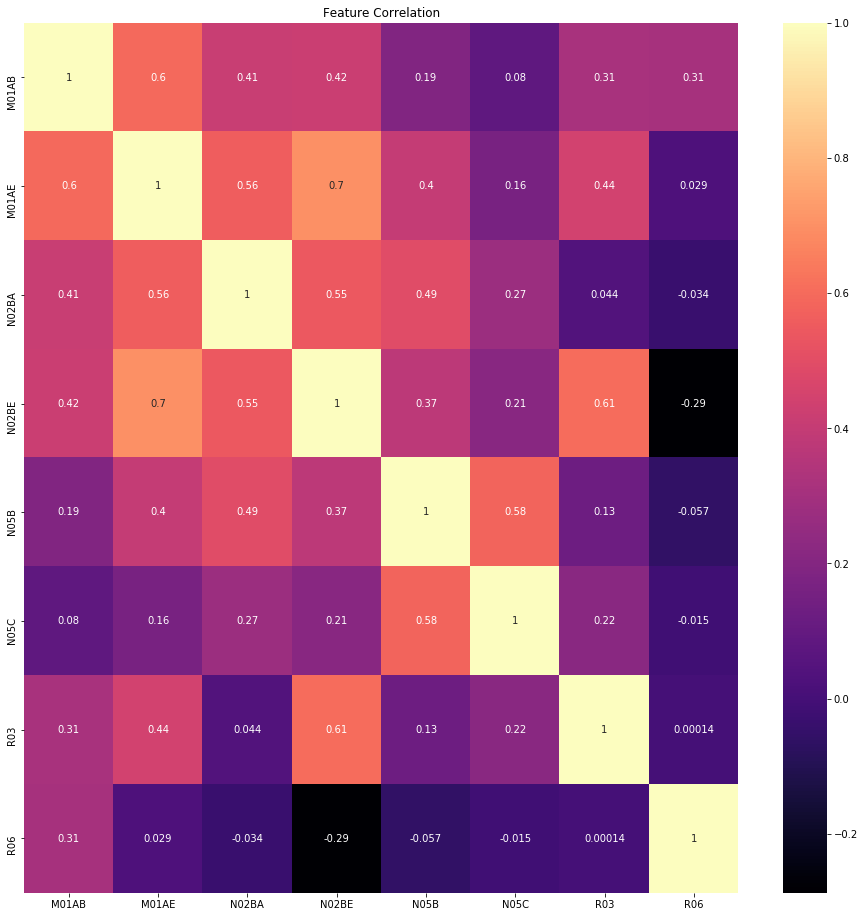

In [46]:
# Setting up figure size for heatmap
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(drug.corr(), annot=True, ax=ax, cmap='magma').set(title = 'Feature Correlation')

There are no obvious correlation between the differnet categories of drugs

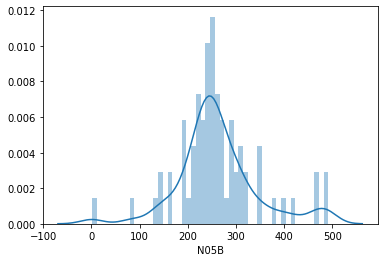

In [47]:
sns.distplot(drug['N05B'],bins=50)

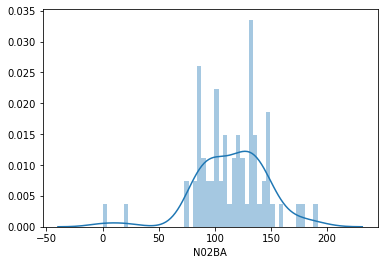

In [48]:
sns.distplot(drug['N02BA'], bins=50)

# Model preprocessing

### Creating two group of drugs dataset

In [49]:
from sklearn.model_selection import train_test_split

# Renaming 'datum' to 'Date'
drug.rename(columns={'datum':'Date'}, inplace=True)

# Converting object datatype to datetime
drug['Date'] = pd.to_datetime(drug['Date'])

# Creating two datasets
drug_N02BA = drug[['Date','N02BA']]
drug_N05B = drug[['Date','N05B']]


### Data preparation for N02BA

In [50]:
# Splitting N02BA to train and test set
train_n02ba, test_n02ba = train_test_split(drug_N02BA, test_size=0.3)

# Sorting based on date 
train_n02ba_sorted = train_n02ba.sort_values('Date', ascending=True)
test_n02ba_sorted = test_n02ba.sort_values('Date', ascending=True)

# Resetting index. Using index as X instead of date time to avoid confusion 
train_n02ba_sorted.reset_index(inplace=True)
test_n02ba_sorted.reset_index(inplace=True)

# Dropping the old index column
train_n02ba_sorted.drop('index', axis=1, inplace=True)
test_n02ba_sorted.drop('index', axis=1, inplace=True)

# Create test and training set of both X and Y
X_train_n02ba = train_n02ba_sorted.index
y_train_n02ba = train_n02ba_sorted['N02BA']
X_test_n02ba = test_n02ba_sorted.index
y_test_n02ba = test_n02ba_sorted['N02BA']

### Data preparation for N05B

In [51]:
train_n05b, test_n05b = train_test_split(drug_N05B, test_size=0.3)

train_n05b_sorted = train_n05b.sort_values('Date', ascending=True)
test_n05b_sorted = test_n05b.sort_values('Date', ascending=True)

train_n05b_sorted.reset_index(inplace=True)
test_n05b_sorted.reset_index(inplace=True)

train_n05b_sorted.drop('index', axis=1, inplace=True)
test_n05b_sorted.drop('index', axis=1, inplace=True)

X_train_n05b = train_n05b_sorted.index
y_train_n05b = train_n05b_sorted['N05B']
X_test_n05b = test_n05b_sorted.index
y_test_n05b = test_n05b_sorted['N05B']

### Visualizing N02BA training dataset 

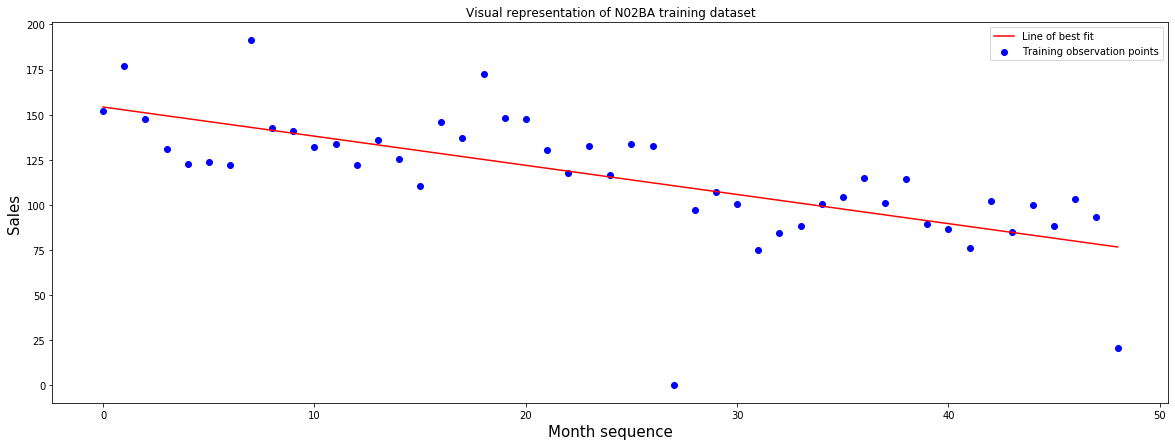

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Reshaping all datasets for Y and X
X_train_N02BA = X_train_n02ba.values.reshape(-1, 1)
X_test_N02BA = X_test_n02ba.values.reshape(-1, 1)
y_train_N02BA = y_train_n02ba.values.reshape(-1, 1)
y_test_N02BA = y_test_n02ba.values.reshape(-1, 1)

# Fitting model based on X and Y train sets
reg.fit(X_train_N02BA, y_train_N02BA)

# Creating figure 
plt.subplots(figsize=(20,7))
plt.title('Visual representation of N02BA training dataset')
plt.xlabel('Month sequence', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.scatter(X_train_N02BA, y_train_N02BA, color='blue', label='Training observation points')
plt.plot(X_train_N02BA, reg.predict(X_train_N02BA), color='red', label='Line of best fit')
plt.legend()

### Visualizing N02BA training dataset 

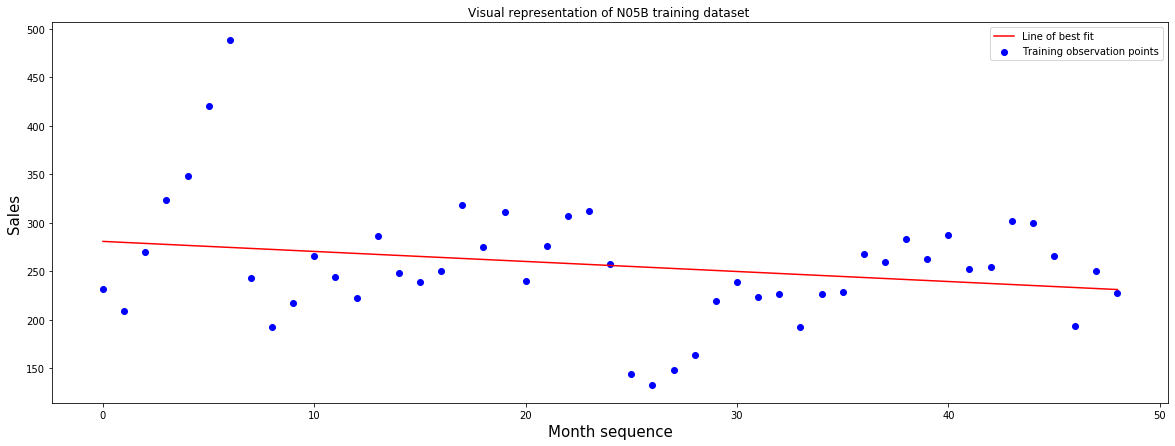

In [53]:
reg = LinearRegression()

X_train_N05B = X_train_n05b.values.reshape(-1, 1)
X_test_N05B = X_test_n05b.values.reshape(-1, 1)
y_train_N05B = y_train_n05b.values.reshape(-1, 1)
y_test_N05B = y_test_n05b.values.reshape(-1, 1)

reg.fit(X_train_N05B, y_train_N05B)

plt.subplots(figsize=(20,7))
plt.title('Visual representation of N05B training dataset ')
plt.xlabel('Month sequence', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.scatter(X_train_N05B, y_train_N05B, color='blue', label='Training observation points')
plt.plot(X_train_N02BA, reg.predict(X_train_N02BA), color='red', label='Line of best fit')
plt.legend()

# Model building (baseline)

I will be build models based on N02BA to find the best models and then apply those models on N05B using default parameters. The following models used and their respective RMSE are:
* Linear Regression (23.74)
* Polynomial Regression 
* Support vector ression (32.28)
* Random forest regression (25.41)
* Gradient boosting (24.96)

In [66]:
# Importing necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
# Creating model instance and performing cross validation
lr = LinearRegression()

crs = cross_val_score(lr, X_train_N02BA , y_train_N02BA, cv=5, scoring='neg_root_mean_squared_error')
print('Average:', crs.mean())

Average: -23.736257552782615


In [72]:
sv = SVR()

crs = cross_val_score(sv, X_train_N02BA , y_train_N02BA.ravel(), cv=5, scoring='neg_root_mean_squared_error')
print('Average:', crs.mean())

Average: -32.28203267131575


In [73]:
rf = RandomForestRegressor()

crs = cross_val_score(rf, X_train_N02BA , y_train_N02BA.ravel(), cv=5, scoring='neg_root_mean_squared_error')
print('Average:', crs.mean())

Average: -25.408884742110622


In [74]:
gb = GradientBoostingRegressor()

crs = cross_val_score(gb, X_train_N02BA , y_train_N02BA.ravel(), cv=5, scoring='neg_root_mean_squared_error')
print('Average:', crs.mean())

Average: -24.95948856308389


I have decided to use all of the algorithms except for SVR.

# Model evaluation on testset

In [59]:
# Importing necessary metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Linear Regression

MAE: 25.98634538386782
RMSE: 30.069935789420224
R2_Score: -0.6114347313197828


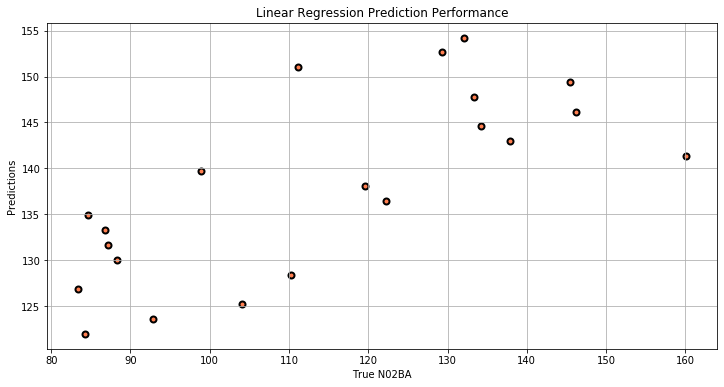

In [60]:
lr.fit(X_train_N02BA , y_train_N02BA)
lr_pre = lr.predict(X_test_N02BA)


print('MAE:', mean_absolute_error(y_test_N02BA, lr_pre))
print('RMSE:', np.sqrt(mean_squared_error(y_test_N02BA, lr_pre)))
print('R2_Score:', r2_score(y_test_N02BA, lr_pre))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test_N02BA, lr_pre,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True N02BA') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance') 
plt.grid()

### Polynomical Regression

MAE: 29.75829090627136
RMSE: 43.92369233925679
R2_Score: -0.27131195786262285


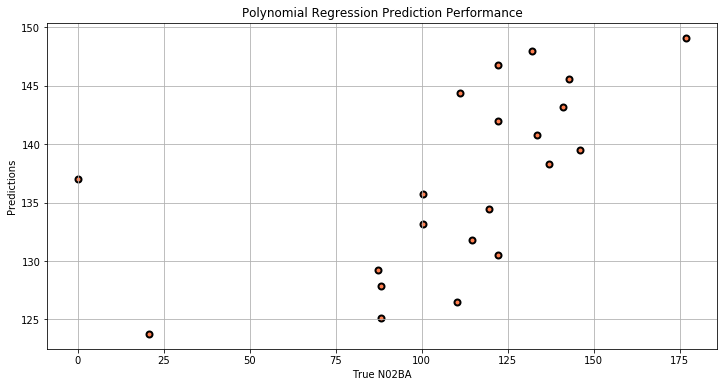

In [34]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train_N02BA)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y_train_N02BA)

poly_pred = poly_reg_model.predict(poly.fit_transform(X_test_N02BA))

print('MAE:', mean_absolute_error(y_test_N02BA, poly_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_N02BA, poly_pred)))
print('R2_Score:', r2_score(y_test_N02BA, poly_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test_N02BA, poly_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True N02BA') 
plt.ylabel('Predictions') 
plt.title('Polynomial Regression Prediction Performance') 
plt.grid()

### Random Forest

MAE: 34.606192857142865
RMSE: 48.50163168619392
R2_Score: -0.5501265287938157


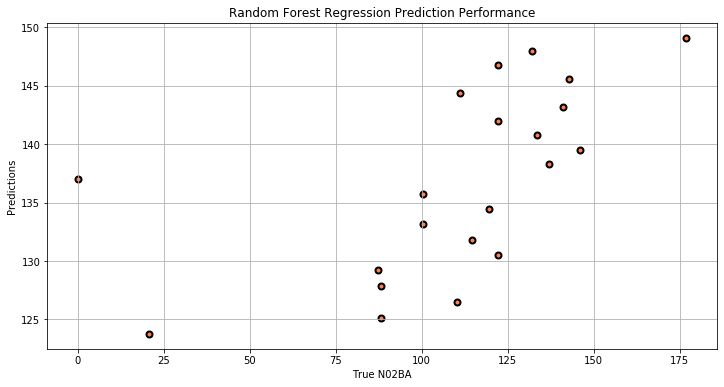

In [40]:
r = RandomForestRegressor()
r.fit(X_train_N02BA , y_train_N02BA.ravel())
r_pred = r.predict(X_test_N02BA)


print('MAE:', mean_absolute_error(y_test_N02BA, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_N02BA, r_pred)))
print('R2_Score:', r2_score(y_test_N02BA, r_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test_N02BA, poly_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True N02BA') 
plt.ylabel('Predictions') 
plt.title('Random Forest Regression Prediction Performance') 
plt.grid()

### Gradient boosting

MAE: 35.665464153851495
RMSE: 50.51497329587653
R2_Score: -0.6814916136769122


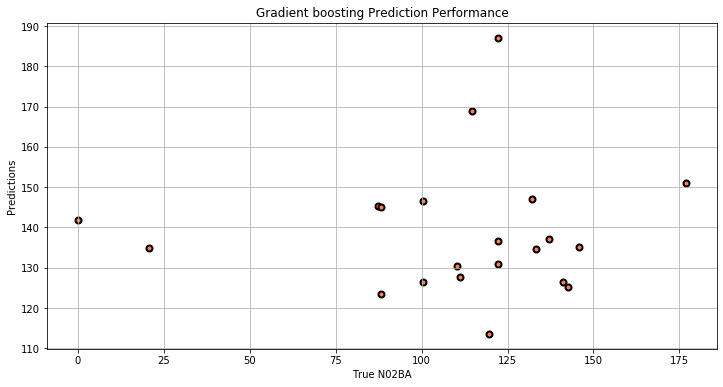

In [36]:
gb.fit(X_train_N02BA , y_train_N02BA.ravel())
gb_pred = gb.predict(X_test_N02BA)

print('MAE:', mean_absolute_error(y_test_N02BA, gb_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_N02BA, gb_pred)))
print('R2_Score:', r2_score(y_test_N02BA, gb_pred))


fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test_N02BA, gb_pred, color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True N02BA') 
plt.ylabel('Predictions') 
plt.title('Gradient boosting Prediction Performance') 
plt.grid()

# Conclusion

The following final models used on the test dataset, N02BA, and their RMSE and R2 respectively are:
* Linear Regression (RMSE: 30.07, R2: -0.611)
* Polynomial Regression (RMSE: 43.92, R2: -0.271)
* Random Forest Ression (RMSE: 48.50, R2: -0.550)
* Gradient boosting (RMSE: 50.51, R2: -0.681)

In general, models can be further improved by: 
* Model tuning, tuning the hyperparameters 
* Exploring seasonality 
* I could use smaller time interval